# Reimagined Quantum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from reimaginedQuantum import *

In [2]:
ports = findPort()
print(ports)

{'FT232R USB UART (/dev/ttyUSB0)': '/dev/ttyUSB0'}


In [3]:
port = CommunicationPort('/dev/ttyUSB0')
number_detectors = 2
exp = Experiment(port, number_detectors)

In [4]:
channels = ["A", "B"]
interval = 0.01
number_points = 50

In [5]:
time, detectors, coins = exp.measure_N_points(channels, interval,
                                              number_points, print_ = False)

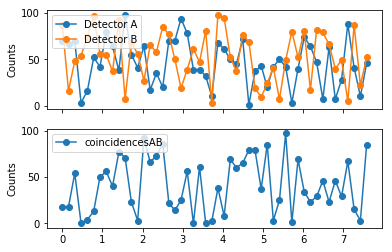

In [6]:
fig, axes = plt.subplots(2, sharex = True)

# DETECTORS
n = detectors.shape[1]
if n == 1:
    axes[0].plot(time, detectors, "-o", label = "%s"%exp.detectors[0].name)
else:
    for i in range(n):
        axes[0].plot(time, detectors[:, i], "-o", label = "%s"%exp.detectors[i].name)

# COINCIDENCES
n = coins.shape[1]
if n == 1:
    axes[1].plot(time, coins, "-o", label = "%s"%exp.coin_channels[0].prefix)
else:
    for i in range(n):
        axes[1].plot(time, detectors[:, i], "-o", label = "%s"%exp.coin_channels[i].prefix)
for ax in axes:
    ax.legend(loc = 2)
    ax.set_ylabel("Counts")

plt.show()